# Kanalkapazität des Binären Symmetrischen Kanals (BSC)

## Beschreibung des binären symmetrischen Kanals

Der binäre symmetrische Kanal (BSC) hat zwei Eingänge ($X_0$,$X_1$) und zwei Ausgänge ($Y_0$,$Y_1$). Aufgrund der Symmetrie lassen sich die Übergangswahrscheinlichkeiten (Likelihood-Funktion) durch die Fehlerwahrscheinlichkeit $P_e$ parametrisieren. Für das Sendesymbol $X_0$ erscheint am Ausgang $Y_0$ mit der Wahrscheinlichkeit $1-P_e$ und $Y_1$ mit der Wahrscheinlichkeit $P_e$. Für $X_1$ gilt Entsprechendes. Mit den A-Priori-Wahrscheinlichkeiten $P_0$ und $P_1=1-P_0$ erhalten wir

\begin{align}
    \Pr \{ y \mid x \} 
    &= \begin{cases}
        1 - P_e & \text{für } y = x \\
        P_e & \text{für } y \neq x
       \end{cases} \\
    \Pr \{ y \} 
    &= \sum_x \Pr \{ y \mid x \} \cdot \Pr \{ x \} 
     = \begin{cases}
         P_0 (1-P_e) + (1-P_0) P_e = P_0 + P_e - 2 P_0P_e & \text{für } y = Y_0 \\
         P_0 P_e + (1-P_0) (1-P_e) = 1 - P_0 - P_e + 2 P_0P_e & \text{für } y = Y_1 
        \end{cases}
\end{align}

Bei gleichwahrscheinlichen Eingangssymbolen mit $P_0=1/2$ sind aufgrund der Symmetrie auch die Ausgangssymbole gleichwahrscheinlich, wie den obigen Gleichungen zu entnehmen ist.

\begin{align}
    \Pr \{ y \} 
    &= \sum_x \Pr \{ y \mid x \} \cdot \Pr \{ x \} 
     = \frac{1}{2} \cdot \sum_x \Pr \{ y \mid x \}
     = \frac{1}{2} \cdot \left( P_e + 1 - P_e \right)
     = \frac{1}{2}
\end{align}


## Transinformation und Kanalkapazität

Für die Transinformation eines Übertragungskanals gilt allgemein

\begin{align}
    I({\cal X};{\cal Y}) 
    &= H({\cal X}) - H({\cal X} \mid {\cal Y})
     = H({\cal Y}) - H({\cal Y} \mid {\cal X})
     = H({\cal X}) + H({\cal Y}) - H({\cal X}, {\cal Y}) \\
    &= \sum_x \Pr \{ {\cal X}=x \} \cdot \sum_y \Pr \{ {\cal Y}=y \mid {\cal X}=x \} \cdot 
        \log_2 \frac{ \Pr \{ {\cal Y}=y \mid {\cal X}=x \} }{ \Pr \{ {\cal Y}=y \} }
\end{align}

Setzen die entsprechenden Wahrscheinlichkeiten für den BSC ein, erhalten wir nach einigen Umformungen für gleichwahrscheinliche Sendesymbole ($P_e=0.5$)

\begin{align}
    I({\cal X};{\cal Y}) 
    &= 1 + P_e \log_2 P_e + (1-P_e) \log_2 (1-P_e) 
     = 1 - H_2(P_e) \; .
\end{align}

Für die Äquivokation, also die durch die Übertragung verlorene Information, gilt in diesem Fall

\begin{align}
    H({\cal X} \mid {\cal Y}) 
    &= - P_e \log_2 P_e - (1-P_e) \log_2 (1-P_e)  
     = H_2(P_e) \; .
\end{align}



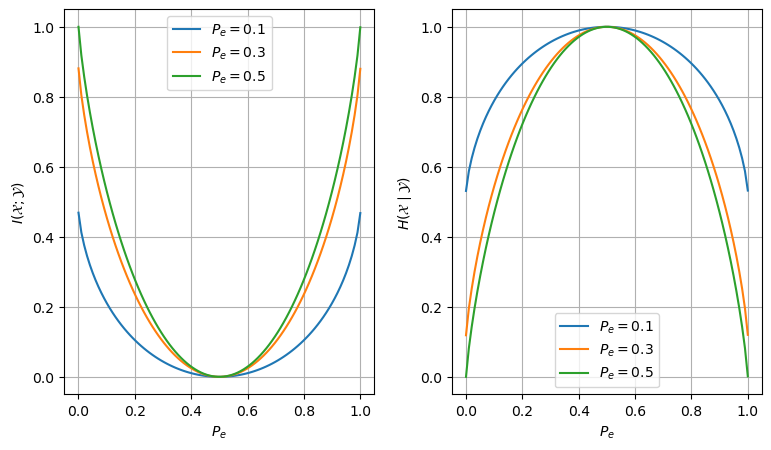

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from info_theory import mi_dmc, mi_awgn

save_txt = False

# error probability of DMC
Pe = np.linspace(0.00001,0.9999,100)
# a priori probability of input signals
P0 = np.array([0.1,0.3,0.5])

mi = np.zeros((len(Pe),len(P0)))

cntr_Pe = 0
for run_Pe in Pe:
    cntr_P0 = 0
    for run_P0 in P0:
        pmf_y_x = np.array([[1.-run_Pe,run_Pe],[run_Pe,1.-run_Pe]])
        pmf_x = np.array([[run_P0],[1.-run_P0]])
        mi[cntr_Pe,cntr_P0] = mi_dmc(pmf_x,pmf_y_x)
        cntr_P0 += 1
    cntr_Pe += 1

fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(wspace=0.25)

ax = fig.add_subplot(121)
ax.plot(Pe, mi[:,0], label='$P_e=0.1$')
ax.plot(Pe, mi[:,1], label='$P_e=0.3$')
ax.plot(Pe, mi[:,2], label='$P_e=0.5$')
plt.legend()
plt.grid(True)
plt.xlabel('$P_e$')
plt.ylabel('$I({\cal X};{\cal Y})$')
#plt.axis([-10, 11, 0, 4])

ax = fig.add_subplot(122)
ax.plot(Pe, 1-mi[:,0], label='$P_e=0.1$')
ax.plot(Pe, 1-mi[:,1], label='$P_e=0.3$')
ax.plot(Pe, 1-mi[:,2], label='$P_e=0.5$')
plt.legend()
plt.grid(True)
plt.xlabel('$P_e$')
plt.ylabel('$H({\cal X} \mid {\cal Y})$')
#plt.axis([-10, 11, 0, 4])

plt.show()

In [7]:
if save_txt:
    erg = np.block([Pe.reshape((-1,1)),mi])
    
    string = 'Pe mi1 mi2 mi3'
    name = 'Results/part4_capacity_bsc'
    np.savetxt(name + '.txt',erg,header=string,comments='')


Die obigen Graphen zeigen, dass die maximale Transinformation für gleichwahrscheinliche Eingangssymbole erreicht wird. Die Kurven weisen ausßerdem einen symmetrischen Verlauf auf, d.h. Fehlerraten $P_e>0.5$ können auf Fehlerraten $1-P_e$ abgebildet werden. Für eine Fehlerwahrscheinlichkeit von $P_e=0.5$ wird die Transinformation Null, d.h. Ein- und Ausgangssignale sind statistisch unabhängig von einander und es wird keine Information mehr übertragen. Dies ist der worst case. Die Äquivokation im rechten Diagramm gibt den Informationsverlust während der Übertragung an. Sie ist logischerweise am größten für $P_e=0.5$.

## AWGN-Kanal mit harter Entscheidung

Geht der BSC-Kanal aus einer binären Datenübertragung (z.B. BPSK) über einen AWGN-Kanal mit harter Entscheidung am Kanalausgang hervor, ist die Fehlerwahrscheinlichkeit des BSC eine Funktion des Signal-Rausch-Abstandes. Die Kanalkapazität kann daher auch über dem Signal-Rausch-Abstand aufgetragen werden.

Im unteren Bild wird eine BPSK-Übertragung über einen AWGN-Kanal (kontinuierlicher Ausgang) mit der über einen BSC-Kanal (AWGN + harte Entscheidung) verglichen. Man sieht den Informationsverlust durch die harte Entscheidung am Kanalausgang. Entscheidungen sollten daher immer erst am Ende der Signalverarbeitungskette durchgeführt werden um Informationsverluste zu vermeiden, solange die Algorithmen sogenannte weiche Information verarbeiten können.

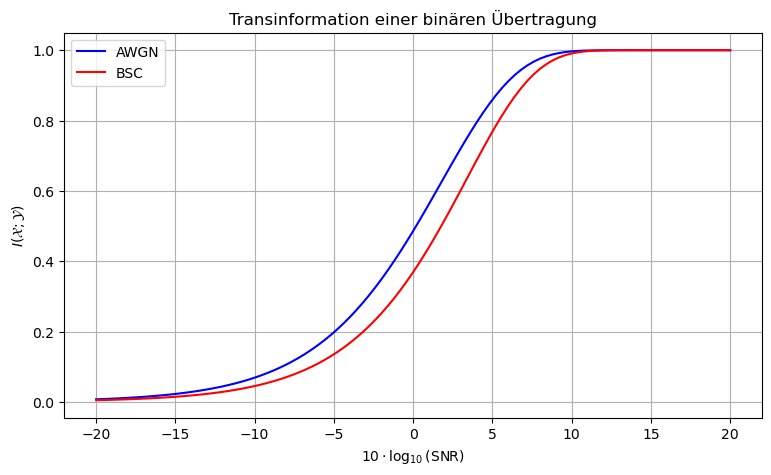

In [11]:
from scipy import special

# definition of signal-to-noise-ratio
SNRdB = np.linspace(-20,20,101)
SNR = 10**(SNRdB/10)

# BPSK alphabet and a priori probabilities
BPSK = ([-1,+1],[0.5,0.5])

# mutual information of AWGN with BPSK input and analog output
I_BPSK = mi_awgn(BPSK[0],BPSK[1],SNRdB,1000)

# error probability for hard decision at channel output
Pe = 0.5 * special.erfc(np.sqrt(SNR/2))

# determine mutual information of resulting BSC
I_BSC = np.zeros(len(SNRdB))
for runSNR in np.arange(len(SNRdB)):
    pmf_y_x = np.array([[1-Pe[runSNR],Pe[runSNR]],[Pe[runSNR],1-Pe[runSNR]]])
    I_BSC[runSNR] = mi_dmc(np.array(BPSK[1]),pmf_y_x)

fig2 = plt.figure(figsize=(9,5))
ax2 = fig2.add_subplot(111)
ax2.plot(SNRdB, I_BPSK, 'b-', label='AWGN')
ax2.plot(SNRdB, I_BSC, 'r-', label='BSC')
plt.legend()
plt.grid(True)
plt.xlabel('$10 \cdot \log_{10}(\mathrm{SNR})$')
plt.ylabel('$I({\cal X};{\cal Y})$')
plt.title('Transinformation einer binären Übertragung')
#plt.axis([-10, 11, 0, 4])
plt.show()   